## ***Loading required libraries*** 

In [2]:
# Loading the tidyverse library
install.packages('tidyverse')
library(tidyverse)
# Loading the arules library
#
install.packages("arules")
library(arules)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




## ***Reading and viewing our data***

In [3]:
path<- "http://bit.ly/SupermarketDatasetII"
salesdf <- read.transactions(path, sep= ",")

Warning message in asMethod(object):
“removing duplicated items in transactions”


***Verifying the object's class***

In [4]:
# This should show us transactions as the type of data that we will need
# ---
# 
class(salesdf)
# Previewing our first 5 transactions
#
inspect(salesdf[1:5])

[1] "transactions"
attr(,"package")
[1] "arules"

    items               
[1] {almonds,           
     antioxydant juice, 
     avocado,           
     cottage cheese,    
     energy drink,      
     frozen smoothie,   
     green grapes,      
     green tea,         
     honey,             
     low fat yogurt,    
     mineral water,     
     olive oil,         
     salad,             
     salmon,            
     shrimp,            
     spinach,           
     tomato juice,      
     vegetables mix,    
     whole weat flour,  
     yams}              
[2] {burgers,           
     eggs,              
     meatballs}         
[3] {chutney}           
[4] {avocado,           
     turkey}            
[5] {energy bar,        
     green tea,         
     milk,              
     mineral water,     
     whole wheat rice}  


***Generating a summary of the transaction dataset***

In [5]:
# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
# ---
# 
summary(salesdf)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

## ***Plot the frequency of items***

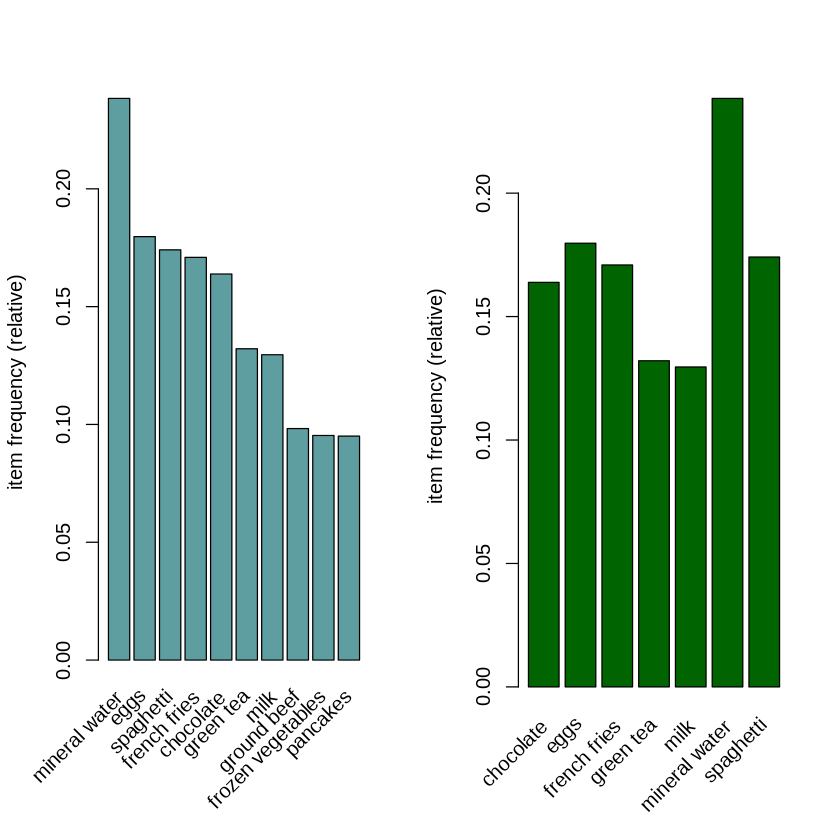

In [6]:
# Displaying top 10 most common items in the salesdf dataset and the items whose relative #importance is at least 10%
par(mfrow = c(1, 2)) # set margins

# plot the frequency of items
itemFrequencyPlot(salesdf, topN = 10,col="cadetblue")  # 10 most common items
itemFrequencyPlot(salesdf, support = 0.1,col="darkgreen") #relative importance is at least 10%

## ***Visualization of the Sparse matrix of transactions***

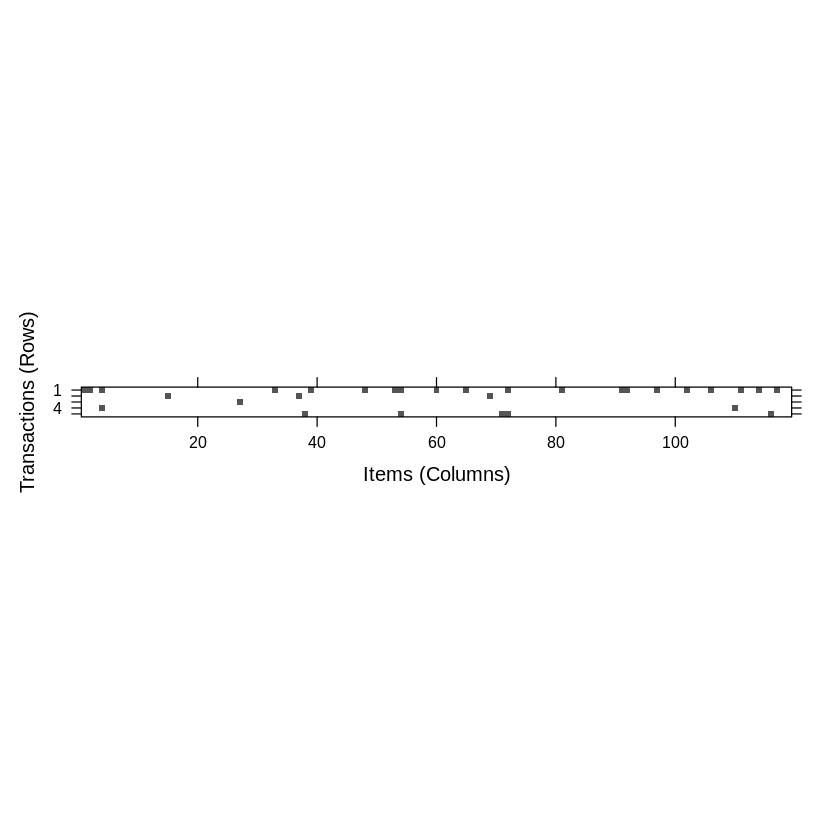

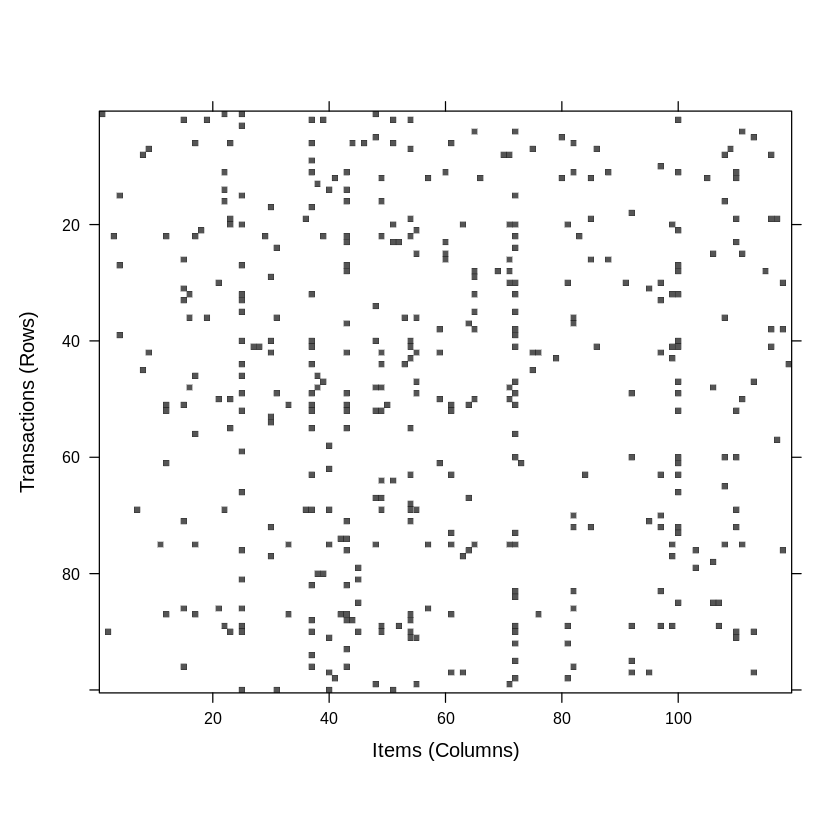

In [7]:
# a visualization of the sparse matrix for the first five transactions
image(salesdf[1:5])
#visualization of a random sample of 100 transactions
image(sample(salesdf, 100))

***Training a model on the data***

In [8]:
apriori(salesdf)
#default settings result in zero rules learned

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

***Set better support and confidence levels to learn more rules***

In [9]:
#
rules <- apriori (salesdf, parameter = list(supp = 0.001, conf = 0.8)) 
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [10]:
rules1 <- apriori (salesdf, parameter = list(supp = 0.002, conf = 0.6)) #Increasing minimum support
rules1

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [43 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 43 rules 

In [11]:
rules2 <- apriori (salesdf, parameter = list(supp = 0.001, conf = 0.6)) #Decreasing confidence
rules2

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 545 rules 

we increased the minimum support of 0.001 to 0.002 and model rules went from 74 to 43. This would lead us to understand that using a high level of support might make the model lose interesting rules. In the second example, we decreased the minimum confidence level to 0.6 and the number of model rules went from 74 to 545. This would mean that using a low confidence level increases the number of rules to quite an extent and many will not be useful.



## ***Exploratory data for best model***

In [12]:
# summary
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
    data ntransactions support confidence
 salesdf          7501   0.001        0.8
                                                  

In [13]:
# Observing rules built in our model i.e. first 5 model rules
# ---
# 
inspect(rules[1:10])

     lhs                              rhs             support     confidence
[1]  {frozen smoothie, spinach}    => {mineral water} 0.001066524 0.8888889 
[2]  {bacon, pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3]  {nonfat milk, turkey}         => {mineral water} 0.001199840 0.8181818 
[4]  {ground beef, nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5]  {mushroom cream sauce, pasta} => {escalope}      0.002532996 0.9500000 
[6]  {milk, pasta}                 => {shrimp}        0.001599787 0.8571429 
[7]  {cooking oil, fromage blanc}  => {mineral water} 0.001199840 0.8181818 
[8]  {black tea, salmon}           => {mineral water} 0.001066524 0.8000000 
[9]  {black tea, frozen smoothie}  => {milk}          0.001199840 0.8181818 
[10] {red wine, tomato sauce}      => {chocolate}     0.001066524 0.8000000 
     coverage    lift      count
[1]  0.001199840  3.729058  8   
[2]  0.002133049  4.666587 13   
[3]  0.001466471  3.432428  9   
[4]  0.001866418  3.5

With 85% confidence someone buying  milk and pasta will buy shrimp  and someone buying black tea and frozen smoothie will with 85% cofidence buy milk and someone buying red wine and tomato sauce has a 80% chance of also getting chocolate


In [14]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                        rhs                 support confidence    coverage      lift count
[1] {french fries,                                                                               
     mushroom cream sauce,                                                                       
     pasta}                 => {escalope}      0.001066524       1.00 0.001066524 12.606723     8
[2] {ground beef,                                                                                
     light cream,                                                                                
     olive oil}             => {mineral water} 0.001199840       1.00 0.001199840  4.195190     9
[3] {cake,                                                                                       
     meatballs,                                                                                  
     mineral water}         => {milk}          0.001066524       1.00 0.001066524  7.717078     8
[4] {cake,          

If someone buys french fries, mushroom cream sauce and pasta they will 100% buy escalope
If they buy meatballs, cake and mineral water they will 100% buy milk 

In [15]:
# If we're interested in making a promotion relating to the sale of mineral water, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing yogurt
# ---
# 
water <- subset(rules, subset = rhs %pin% "mineral water")
 
# Then order by confidence
water<-sort(water, by="confidence", decreasing=TRUE)
inspect(water[1:5])

    lhs                     rhs                 support confidence    coverage     lift count
[1] {ground beef,                                                                            
     light cream,                                                                            
     olive oil}          => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[2] {cake,                                                                                   
     olive oil,                                                                              
     shrimp}             => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[3] {red wine,                                                                               
     soup}               => {mineral water} 0.001866418  0.9333333 0.001999733 3.915511    14
[4] {ground beef,                                                                            
     pancakes,                                              

someone who takes ground beef,light cream,olive oil or cake,olive oil,shrimp  will most likely take mineral water. Hence water should be close to these items 

In [16]:
# What if we wanted to determine items that customers might buy 
# who have previously bought mineral water?
# ---
# 
water <- subset(rules, subset = lhs %pin% "mineral water")
 
# Then order by confidence
water<-sort(water, by="confidence", decreasing=TRUE)
inspect(water[1:5])

    lhs                                     rhs           support    
[1] {cake, meatballs, mineral water}     => {milk}        0.001066524
[2] {eggs, mineral water, pasta}         => {shrimp}      0.001333156
[3] {herb & pepper, mineral water, rice} => {ground beef} 0.001333156
[4] {light cream, mineral water, shrimp} => {spaghetti}   0.001066524
[5] {grated cheese, mineral water, rice} => {ground beef} 0.001066524
    confidence coverage    lift      count
[1] 1.0000000  0.001066524  7.717078  8   
[2] 0.9090909  0.001466471 12.722185 10   
[3] 0.9090909  0.001466471  9.252498 10   
[4] 0.8888889  0.001199840  5.105326  8   
[5] 0.8888889  0.001199840  9.046887  8   


In [17]:
# sorting the rules by lift
inspect(sort(rules, by = "lift")[1:5], decreasing=TRUE)

    lhs                        rhs                     support confidence    coverage      lift count
[1] {eggs,                                                                                           
     mineral water,                                                                                  
     pasta}                 => {shrimp}            0.001333156  0.9090909 0.001466471 12.722185    10
[2] {french fries,                                                                                   
     mushroom cream sauce,                                                                           
     pasta}                 => {escalope}          0.001066524  1.0000000 0.001066524 12.606723     8
[3] {milk,                                                                                           
     pasta}                 => {shrimp}            0.001599787  0.8571429 0.001866418 11.995203    12
[4] {mushroom cream sauce,                                                        

These rules appear to be more interesting than the ones we looked at previously. The first rule, with a lift of about 12.722185 , implies that people who buy eggs, mineral water,pasta are nearly 12 times more likely to buy shrimp than the typical customer—perhaps for a pasta dinner of some sort? Rule 5 is also interesting. frozen vegetables is over nine times more likely to be found in a shopping cart with chocolate, ground beef, milk, mineral water, spaghetti versus other carts, suggesting perhaps a quick romantic dinner?

some of the items that should be close to mineral water is ground beef and shrimp as they are always picked before or after by customers 

Pasta should be close to mineral water, escalope and shrimp as they have an association 

 A person buying french fries, mushroom cream sauce,pasta}with 100% confidence will 12 times most likely pick{escalope}than the typical customer hence these types of food should be close together 

